In this project I will explore a dataset on Starbuck's Malaysia customer survey, analyse some main features and findings,predict whether customers will visit Starbucks again using the ratings and use a Kemans clustering algorithm to study the dataset and segment customers into groups.


In [11]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
%matplotlib inline 
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

In [12]:
Starbucks=pd.read_csv("C:/Users/cana/Desktop/文件/python/Starbucks satisfactory survey.csv")

In [13]:
Starbucks.head(10)

,Timestamp,1. Your Gender,2. Your Age,3. Are you currently....?,4. What is your annual income?,5. How often do you visit Starbucks?,6. How do you usually enjoy Starbucks?,7. How much time do you normally spend during your visit?,8. The nearest Starbucks's outlet to you is...?,9. Do you have Starbucks membership card?,...,"11. On average, how much would you spend at Starbucks per visit?","12. How would you rate the quality of Starbucks compared to other brands (Coffee Bean, Old Town White Coffee..) to be:",13. How would you rate the price range at Starbucks?,14. How important are sales and promotions in your purchase decision?,"15. How would you rate the ambiance at Starbucks? (lighting, music, etc...)",16. You rate the WiFi quality at Starbucks as..,"17. How would you rate the service at Starbucks? (Promptness, friendliness, etc..)",18. How likely you will choose Starbucks for doing business meetings or hangout with friends?,19. How do you come to hear of promotions at Starbucks? Check all that apply.,20. Will you continue buying at Starbucks?
0,2019/10/01 12:38:43 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Dine in,Between 30 minutes to 1 hour,within 1km,Yes,...,Less than RM20,4,3,5,5,4,4,3,Starbucks Website/Apps;Social Media;Emails;Dea...,Yes
1,2019/10/01 12:38:54 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,1km - 3km,Yes,...,Less than RM20,4,3,4,4,4,5,2,Social Media;In Store displays,Yes
2,2019/10/01 12:38:56 PM GMT+8,Male,From 20 to 29,Employed,"Less than RM25,000",Monthly,Dine in,Between 30 minutes to 1 hour,more than 3km,Yes,...,Less than RM20,4,3,4,4,4,4,3,In Store displays;Billboards,Yes
3,2019/10/01 12:39:08 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,more than 3km,No,...,Less than RM20,2,1,4,3,3,3,3,Through friends and word of mouth,No
4,2019/10/01 12:39:20 PM GMT+8,Male,From 20 to 29,Student,"Less than RM25,000",Monthly,Take away,Between 30 minutes to 1 hour,1km - 3km,No,...,Around RM20 - RM40,3,3,4,2,2,3,3,Starbucks Website/Apps;Social Media,Yes
5,2019/10/01 12:39:39 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Dine in,Between 30 minutes to 1 hour,more than 3km,No,...,Less than RM20,4,3,5,5,4,5,4,Social Media,Yes
6,2019/10/01 12:39:42 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Dine in,Below 30 minutes,within 1km,Yes,...,Around RM20 - RM40,5,5,5,5,3,5,5,Starbucks Website/Apps;Social Media,Yes
7,2019/10/01 12:40:58 PM GMT+8,Male,From 20 to 29,Employed,"RM50,000 - RM100,000",Rarely,Dine in,Between 30 minutes to 1 hour,more than 3km,Yes,...,Less than RM20,4,2,3,3,3,3,3,Starbucks Website/Apps;Social Media;Emails;Thr...,Yes
8,2019/10/01 12:42:27 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Drive-thru,Below 30 minutes,more than 3km,Yes,...,More than RM40,5,4,4,4,4,4,4,Starbucks Website/Apps;Social Media;Through fr...,Yes
9,2019/10/01 12:43:36 PM GMT+8,Male,From 20 to 29,Employed,"Less than RM25,000",Monthly,Take away,Below 30 minutes,more than 3km,No,...,Around RM20 - RM40,4,3,3,4,3,3,4,Social Media;Through friends and word of mouth,Yes


In [14]:
Starbucks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 21 columns):
 #   Column                                                                                                                  Non-Null Count  Dtype 
---  ------                                                                                                                  --------------  ----- 
 0   Timestamp                                                                                                               122 non-null    object
 1   1. Your Gender                                                                                                          122 non-null    object
 2   2. Your Age                                                                                                             122 non-null    object
 3   3. Are you currently....?                                                                                               122 non-null    object
 4   4.

we will clear the coolumns that do not contribute to analysis of customer behavior and change the header for each column first


In [15]:
Starbucks=Starbucks.drop('Timestamp',axis=1)
Starbucks.columns=['Gender','Age','Status','Income','Frequency','Method','timepervisit','nearest','membership','fequencyofpurchase','spending','comparerate','pricerate','promotion','rateambiance','Wifi','rateservice','situational','source','loyalty']

In [16]:
Starbucks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Gender              122 non-null    object
 1   Age                 122 non-null    object
 2   Status              122 non-null    object
 3   Income              122 non-null    object
 4   Frequency           122 non-null    object
 5   Method              121 non-null    object
 6   timepervisit        122 non-null    object
 7   nearest             122 non-null    object
 8   membership          122 non-null    object
 9   fequencyofpurchase  122 non-null    object
 10  spending            122 non-null    object
 11  comparerate         122 non-null    int64 
 12  pricerate           122 non-null    int64 
 13  promotion           122 non-null    int64 
 14  rateambiance        122 non-null    int64 
 15  Wifi                122 non-null    int64 
 16  rateservice         122 no

In [17]:
Starbucks=Starbucks.dropna()


In [18]:
Starbucks.describe()

,comparerate,pricerate,promotion,rateambiance,Wifi,rateservice,situational
count,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000
mean,3.685950,2.909091,3.818182,3.760331,3.256198,3.752066,3.520661
std,0.913173,1.072381,1.064581,0.931171,0.962020,0.829468,1.033595
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,4.000000
75%,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


We can see that average price rating is 3, comparing with other coffee retailers rating is 3.6, wifi rating is 3.2, rating for ambiance is 3.7 and service rating is 3.7.
Overall the rating performance is quite decent, we can examine how closely correlated each rating is with if the customer is going to visit again, but first transform the loyalty column to 1 and 0, with 1 indicating will visit again and 0 indicating will not.


In [19]:
Starbucks.loyalty.replace(('yes','no'),(1,0),inplace=True)

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
log=LogisticRegression()
x=Starbucks[['comparerate','pricerate','promotion','rateambiance','Wifi','rateservice']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)
y=Starbucks['loyalty']
model=log.fit(X_scaled,y)
np.array(model.coef_)



array([[ 0.47213659,  1.01208935,  0.08612373,  0.31996509, -0.03783657,
        -0.11263459]])

we can see that the highest price rating is highly correlated, followed by comparsion rating with other coffee sellers, wifi and service rating followed a surprisingly negative linear correlation, this may show the pricing strategy is starbucks will be very crucial and that Starbucks should continue to strengthen it's competitive advantage in order to gain more support from customers. While pricing is particularly important, its average rating is lowest among all rating variables, thus Starbucks may need to reconsider its pricing strategy and its focus. 


Now let's look at age, status and income factors


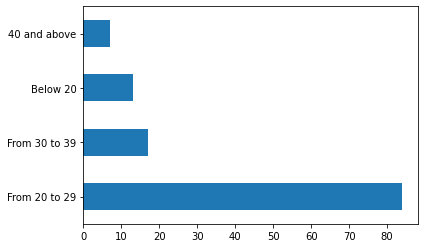

In [21]:
Starbucks.Age.value_counts()
Starbucks['Age'].value_counts().plot(kind='barh')

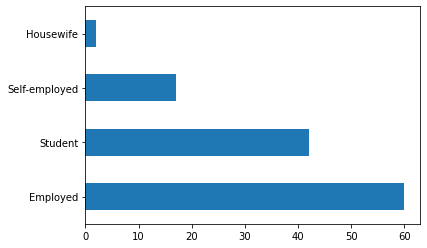

In [22]:
Starbucks['Status'].value_counts().plot(kind='barh')

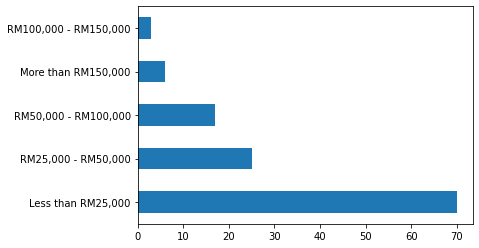

In [23]:
Starbucks['Income'].value_counts().plot(kind='barh')

we can see that most of its customers come from age group of 20-29, mostly employed and have income less than RM 25,000. What this might mean is that starbucks should tailor its price towards lower income groups, and maintain its unique selling point of fast and convinent, serving the majority of its customer who are employed and at a quite young age.

How I would like to see which of these three factors have most influence on the frenquency of purchase and amount spent each time

In [24]:
Starbucks.Age.value_counts()

From 20 to 29    84
From 30 to 39    17
Below 20         13
40 and above      7
Name: Age, dtype: int64

In [25]:
Starbucks.Age.replace(('From 20 to 29','From 30 to 39','Below 20','40 and above'),(2,3,1,4),inplace=True)

In [26]:
Starbucks.Status.value_counts()

Employed         60
Student          42
Self-employed    17
Housewife         2
Name: Status, dtype: int64

In [27]:
Starbucks.Status.replace(('Employed','Student','Self-employed','Housewife'),(2,1,3,4),inplace=True)

In [28]:
Starbucks.Income.value_counts()

Less than RM25,000       70
RM25,000 - RM50,000      25
RM50,000 - RM100,000     17
More than RM150,000       6
RM100,000 - RM150,000     3
Name: Income, dtype: int64

In [29]:
Starbucks.Income.replace(('Less than RM25,000','RM25,000 - RM50,000','RM50,000 - RM100,000','More than RM150,000','RM100,000 - RM150,000'),(1,2,3,4,5),inplace=True)

In [30]:
Starbucks.head()

,Gender,Age,Status,Income,Frequency,Method,timepervisit,nearest,membership,fequencyofpurchase,spending,comparerate,pricerate,promotion,rateambiance,Wifi,rateservice,situational,source,loyalty
0,Female,2,1,1,Rarely,Dine in,Between 30 minutes to 1 hour,within 1km,Yes,Coffee,Less than RM20,4,3,5,5,4,4,3,Starbucks Website/Apps;Social Media;Emails;Dea...,Yes
1,Female,2,1,1,Rarely,Take away,Below 30 minutes,1km - 3km,Yes,Cold drinks;Pastries,Less than RM20,4,3,4,4,4,5,2,Social Media;In Store displays,Yes
2,Male,2,2,1,Monthly,Dine in,Between 30 minutes to 1 hour,more than 3km,Yes,Coffee,Less than RM20,4,3,4,4,4,4,3,In Store displays;Billboards,Yes
3,Female,2,1,1,Rarely,Take away,Below 30 minutes,more than 3km,No,Coffee,Less than RM20,2,1,4,3,3,3,3,Through friends and word of mouth,No
4,Male,2,1,1,Monthly,Take away,Between 30 minutes to 1 hour,1km - 3km,No,Coffee;Sandwiches,Around RM20 - RM40,3,3,4,2,2,3,3,Starbucks Website/Apps;Social Media,Yes


In [31]:
Starbucks.spending.value_counts()

Less than RM20        58
Around RM20 - RM40    45
Zero                  11
More than RM40         7
Name: spending, dtype: int64

In [32]:
Starbucks.spending.replace(('Less than RM20','Around RM20 - RM40','Zero','More than RM40' ),(2,3,1,4),inplace=True)

In [33]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
x1=Starbucks[['Age','Status','Income']]
X1_scaled = scaler.fit_transform(x1)
y1=Starbucks[['spending']]
Y1_scaled=scaler.fit_transform(y1)
model2=lm.fit(X1_scaled,Y1_scaled)
model2.coef_

array([[0.28076783, 0.0350975 , 0.10119763]])

there is a weak correlation between amount spent and age,indicating that as age increases amount spent increases, however the correlation is not very significant, however this only measures the linear correlation, whereas intuitively we might expect people around the middle age groups (20-29 and 30-39) to spend more in Starbucks, so it might be useful to look at their relationship from plots  

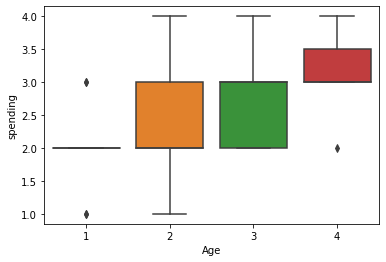

In [34]:
sns.boxplot(Starbucks['Age'],Starbucks['spending'])

There is still evidently a weak relationship between age and spending, however it might not be very significant, if we use OLS method to do some statistical inference on age, income, status and spending we get the following result.

In [35]:
model3=sm.OLS.from_formula("spending~Income+Age+Status",data=Starbucks)
result3=model3.fit()
result3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               spending   R-squared:                       0.131
Model:                            OLS   Adj. R-squared:                  0.109
Method:                 Least Squares   F-statistic:                     5.886
Date:                Wed, 28 Oct 2020   Prob (F-statistic):           0.000889
Time:                        23:38:10   Log-Likelihood:                -125.55
No. Observations:                 121   AIC:                             259.1
Df Residuals:                     117   BIC:                             270.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.5537      0.224      6.931      0.000       1.110       1.998
Income         0.0717      0.073      0.977      0.331      -0.074       0.217
Age            0.3042      0.114      2.676      0.009       0.079       0.529
Status         0.0355      0.102      0.349      0.728      -0.166       0.237
==============================================================================
Omnibus:                        0.266   Durbin-Watson:                   1.941
Prob(Omnibus):                  0.876   Jarque-Bera (JB):                0.224
Skew:                           0.103   Prob(JB):                        0.894
Kurtosis:                       2.951   Cond. No.                         13.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

With the large F statistic we can infer that there is at least one variable that is significant, and we can see from the summary that the P value for age is 0.009 which pass a 10% level significant test, wiht confident interval of 0.089 to 0.529. Thus, although most of Starbuck's customer are between age of 20-30, the customers that spend larger amount are actually the group above 40. 


Now we will divide the data into training  and testing set and try to predict whether the customer will visit again using the ratings

In [36]:
from sklearn.model_selection import train_test_split


In [37]:
xtrain,xtest,ytrain,ytest=train_test_split(X_scaled,y,test_size=0.3,random_state=0)
model4=log.fit(xtrain,ytrain)
np.array(model4.coef_)
prediction=model4.predict(xtest)
from sklearn import metrics
print(metrics.accuracy_score(ytest,prediction))




0.7837837837837838


The accuracy is 78% which is quite decent, however provided that promotion rating and wifi rating are found to be not very significant in our previous output result,  we might want to try running the model again removing the two variables

In [38]:
xless=Starbucks[['comparerate','pricerate','rateambiance','rateservice']]
Xless_scaled = scaler.fit_transform(xless)
xlesstrain,xlesstest,ytrain,ytest=train_test_split(Xless_scaled,y,test_size=0.3,random_state=0)
model5=log.fit(xlesstrain,ytrain)
np.array(model5.coef_)
predictionless=model5.predict(xlesstest)
print(metrics.accuracy_score(ytest,prediction))



0.7837837837837838


The accuracy of prediction did not change, which proves that customer's attention to promotion and their rating for wifi services are not very significant in determining their next visit, and that our model could well predict whether a customer will visit Starbucks again based on their rating to Starbucks's price, ambiance, service and rating comparing to other coffee retailers.

If we want to segment our customers based on the current rating figures we have, we might try to proceed with first PCA analysis then k means clustering:   

In [43]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_scaled)

cluster_range = range(1, 10,1)
cluster_errors = []

for num_clusters in cluster_range:
  clusters = KMeans( num_clusters )
  clusters.fit( principalComponents )
  cluster_errors.append( clusters.inertia_ )


clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:10]



,num_clusters,cluster_errors
0,1,490.773010
1,2,265.685759
2,3,199.649878
3,4,145.605491
4,5,118.309054
5,6,97.358927
6,7,81.121773
7,8,67.346753
8,9,57.550162


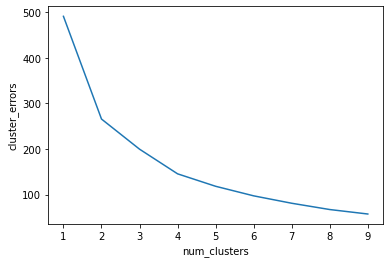

In [44]:
sns.lineplot(clusters_df['num_clusters'], clusters_df['cluster_errors'])


From this plot we can see that using the elbow method, using 2-4 clusters are most suitable and in this case because we only have 6 regressors we might choose to use 3 cluster.

In [57]:
kmeans = KMeans(n_clusters=3)
model= kmeans.fit(principalComponents)
y_kmeans = kmeans.predict(principalComponents)
y_kmeans


array([1, 1, 0, 2, 2, 1, 1, 2, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 2, 0, 2, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       2, 0, 0, 0, 0, 2, 0, 2, 1, 2, 1, 2, 0, 1, 0, 0, 2, 0, 2, 0, 0, 0,
       1, 2, 0, 0, 1, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 1, 0, 0, 0, 2, 0, 1,
       1, 1, 1, 2, 1, 2, 0, 2, 2, 0, 0, 2, 2, 0, 1, 1, 1, 2, 2, 2, 2, 0,
       1, 2, 1, 2, 1, 0, 0, 1, 2, 1, 2])

In [80]:
table=pd.DataFrame(data=[principalComponents[:, 0],principalComponents[:,1],y_kmeans])
table=table.transpose()
table.columns=['x','y','group']
table.head()

,x,y,group
0,-1.606561,0.754830,1.0
1,-1.369145,0.384930,1.0
2,-0.803773,0.179729,0.0
3,2.271372,1.712719,2.0
4,2.093123,-0.152031,2.0


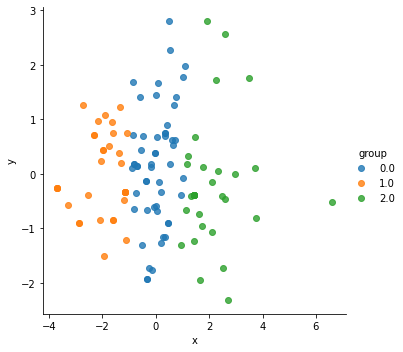

In [83]:

sns.lmplot(data=table,x='x',y='y',hue='group',fit_reg=False,legend=True)


In [92]:
pca.components_
df = pd.DataFrame(pca.components_,columns=('comparerate','pricerate','promotion','rateambiance','Wifi','rateservice'))
df

,comparerate,pricerate,promotion,rateambiance,Wifi,rateservice
0,-0.411379,-0.355336,-0.304683,-0.477936,-0.406380,-0.467016
1,-0.474197,-0.544278,0.599487,0.008940,0.301169,0.169503


from the k means plot we can see that the main determinant of which group the customer falls in is the "x" values, which corresponds to the first component in the PCA analysis and y values ( the second component of PCA) had very little influence on grouping. Thus we took a closer look at the PCA result and found that in component 1, rating for ambiance and the rating for service have higher influence in the feature, and rating for how much customer's decision depend on promotion have very little influence on the component, so we may inference that the customers could potentially be separated based on how muuch they rate the ambiance of Starbuck stores and the rate for the services starbuck provides. 